<a href="https://colab.research.google.com/github/jashanmalhi/Data-Analysis/blob/master/Used_Cars_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="45px" src="https://colab.research.google.com/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>



<h1>The Used Cars Dataset Exploration and Analysis</h1>

###Jashneet Kaur
###jks888@uregina.ca, Id 200380410
###University of Regina
###Spring / Summer 2019

## INRTRODUCTION

###Chosen Dataset

The notebook used the dataset of [used cars](https://www.kaggle.com/austinreese/craigslist-carstrucks-data/version/7) available at the kaggle.com. The dataset was scrapped form the Cragslist.com and it includes the details of used cars listings in US. The dataset used was scrapped just a month ago (Austin Reese, 2019)

###Interest in dataset

While scrolling through the list of datasets available at Kaggle, this one came to my attention. I have keen interest in the dataset because of my interest in cars, their brands and relative prices. By exploring the dataset I can definately enhance my knowledge of cars with respect to their market value. The selling and purchasing of used cars has always been a great business, by getting some insights of the cars price listings and their conditions, one can get a fair idea of any used car's value in market. Let's explore the dataset.

###Data Formatting
The dataset is already given with headers and the rows, it is then formatted by deleting some rows and columns. The data is then sorted by the year of manufacture. (Tomesh,2019)

###Dataset access from Google Drive

The dataset was downloaded from the Kaggle, provided by Austin Reese at the web page [used cars](https://www.kaggle.com/austinreese/craigslist-carstrucks-data/version/7). There are two versions of the dataset available at the web page, I have used the dataset "CraglistsVehicles.csv". To use the csv file i have first downloaded it and then uploaded it to my google drive. Then used the below code to import my drive and mount the drive content here. I have renamed my dataset file as "CarList.csv". 


In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
cd gdrive/My Drive

/content/gdrive/My Drive


In [0]:
#Importing teh require d libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# SCRUBBING AND FORMATTING DATA

###DataFrame

The data is read from the csv file and is automatting converted to a dataframe and saved in ledger.

###Data Features

There are a total of 547764 rows and  21 columns in the dataset. After cleaning up teh adtaset I am left with data rows and 17 data columns. The dataset columns used for analysis are shown below.

###Cleaning Dataset

I have deleted the below mentioned columns from the dataset. (TutorialsPoint,2019)

####url:
This redirects the dataset to the actual posting of the advertisement. I do not need teh link anymore for my analysis of data, so this will be removed from my dataframe.

####city_url : 
This was deleted because i do not need the city url link. The city can be plotted by using the latitudinal and longitudinal values.

####image_url : 
The images of the vehicles are not utilized and I do not need them in price prediction.

####VIN : 
Most of the VIN values are not provided and I am not going to use the VIN for the vehicle price analysis.

####condition: 
It describes the car condition like excellent or used. The car condition depends on the mileage and the manufacturing year of the car so I do not need this column.


The rows with missing values or odd values of the below mentioned columns were deleted from the dataset. The deletion was done for the empty values of below columns because they are the key factors to predict a  used car's price. I have deleted any row with the car's year of manufacture before 1960, because car industry boomed during 1960's and the cars built before 1960 would not provide a good data for the used car price prediction. (StackOverflow,2019)

price; 
year; 
transmission; 
odometer; 
manufacturer; 
cylinders

In [0]:
#read the file data into a ledger variable
ledger = pd.read_csv('CarList.csv') 

**********************************************************************************************

In [0]:
#get the total number of rows and columns
ledger.shape

(547764, 22)

In [0]:
ledger.size

12050808

In [0]:
#delete the columns
del ledger["url"]
del ledger["city_url"]
del ledger["VIN"]
del ledger["image_url"]
del ledger["condition"]

In [0]:
#I have used the dropna command for all the rows where even any one column value is missing.
ledger = ledger.dropna()

In [0]:
#delete the rows where year < 1960 and price < 200 
ledger.drop(ledger[ledger.price < 200].index, inplace = True)


In [0]:
ledger.drop(ledger[ledger.year < 1960].index, inplace = True)

In [0]:
#sorted the listings by the year of manufacture in descending order
ledger.sort_values(["year"], ascending=False, inplace=True)

In [0]:
ledger = ledger.reset_index(drop=True)

In [0]:
ledger.count()

city            109418
price           109418
year            109418
manufacturer    109418
make            109418
cylinders       109418
fuel            109418
odometer        109418
title_status    109418
transmission    109418
drive           109418
size            109418
type            109418
paint_color     109418
desc            109418
lat             109418
long            109418
dtype: int64

# EXPLORATORY DATA ANALYSIS

####Data information
The dataset is explored using inbuilt functions to find it's dimentions  and other information.

####Data Dimentions
the functions revelaed that the data is two dimentional and it has a total of 109418 rows and 17 columns after the data cleaning process.

####Data head and tail

Some of the rows have odometer value as zero, this means there is missing value in the data. The odometer value as 0 either means that the car is not runnable anymore or it is brand new or the odometer is not working. I will look into these rows to see if their description column tells more about these cars with the odometer value zero. This would help in making a decision.

####Data Description
It shows the min and maximum values of the different columns.

####Data Plotting
I have decided to plot the price listings against the number fo listings for that price to see the relationship between these two.(Chris, 2017)

Most of teh exploration techniques were used from lecture notes of Tomesh (Tomesh,2019)





In [0]:
ledger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109418 entries, 0 to 109417
Data columns (total 17 columns):
city            109418 non-null object
price           109418 non-null int64
year            109418 non-null float64
manufacturer    109418 non-null object
make            109418 non-null object
cylinders       109418 non-null object
fuel            109418 non-null object
odometer        109418 non-null float64
title_status    109418 non-null object
transmission    109418 non-null object
drive           109418 non-null object
size            109418 non-null object
type            109418 non-null object
paint_color     109418 non-null object
desc            109418 non-null object
lat             109418 non-null float64
long            109418 non-null float64
dtypes: float64(4), int64(1), object(12)
memory usage: 14.2+ MB


In [0]:
ledger.ndim

2

In [0]:
ledger.head(5)

,city,price,year,manufacturer,make,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,desc,lat,long
0,"austin, TX",10950,2020.0,toyota,corolla,4 cylinders,gas,6120.0,salvage,automatic,fwd,compact,sedan,blue,Elite Motor Cars of MiamiAsk for: EdgarâÂ (7...,25.827103,-80.241520
1,"panama city, FL",46900,2020.0,jeep,gladiator,6 cylinders,gas,8.0,clean,automatic,4wd,mid-size,SUV,red,NEW JEEP GLADIATOR...Sport Model..Automatic an...,30.175202,-85.667038
2,"rochester, MN",68600,2020.0,toyota,supra,6 cylinders,gas,0.0,clean,automatic,rwd,mid-size,coupe,red,Red Supra - Launch Edition - One of 1500 Limit...,44.046267,-91.674145
3,ventura county,270,2019.0,jeep,cherokee latitude sport,4 cylinders,gas,4500.0,clean,automatic,fwd,mid-size,SUV,black,Lease transfer on a 2019 Jeep Cherokee w/ leat...,34.263482,-118.905344
4,"green bay, WI",69480,2019.0,ford,expedition,6 cylinders,gas,4233.0,clean,automatic,4wd,full-size,SUV,grey,2019 Ford Expedition Limited - Stone Gray\n\n\...,44.520390,-88.066450


In [0]:
ledger.tail(5)

,city,price,year,manufacturer,make,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,desc,lat,long
109413,new york city,30000,1960.0,chevrolet,bel air,8 cylinders,gas,638.0,clean,automatic,rwd,full-size,coupe,red,Must see over 75k spent in rebuild over two ye...,40.674429,-73.393053
109414,"st cloud, MN",15900,1960.0,ford,f100 pick up,8 cylinders,gas,61000.0,clean,manual,rwd,full-size,pickup,grey,"UP FOR SALE, 1960 FORD F100, NUMBERS MATCHING,...",45.810700,-94.832100
109415,"hartford, CT",50000,1960.0,chevrolet,corvette,8 cylinders,gas,62000.0,clean,manual,rwd,mid-size,convertible,red,New tires\nNew rugs\n62000 miles \nTotal overh...,41.585200,-72.612800
109416,san luis obispo,3500,1960.0,ford,thunderbird,8 cylinders,gas,5000.0,clean,automatic,fwd,full-size,coupe,silver,Newer 390 fe motor installed. Has approximatel...,35.615720,-120.669079
109417,"winchester, VA",40000,1960.0,pontiac,bonneville convertible,8 cylinders,gas,94101.0,clean,automatic,rwd,full-size,convertible,custom,"Fully restored in 2006. New paint, new upholst...",38.911300,-77.967400


In [0]:
ledger.describe()

,price,year,odometer,lat,long
count,1.094180e+05,109418.000000,1.094180e+05,109418.000000,109418.000000
mean,9.333188e+04,2007.930569,1.191248e+05,38.510519,-92.013388
std,1.648350e+07,7.760470,1.315943e+05,5.596388,16.251720
min,2.000000e+02,1960.000000,0.000000e+00,-82.890831,-161.874900
25%,4.650000e+03,2005.000000,6.977400e+04,34.926700,-97.951800
50%,8.900000e+03,2009.000000,1.123220e+05,39.363221,-86.875248
75%,1.590000e+04,2013.000000,1.552140e+05,42.477134,-80.396200
max,4.045085e+09,2020.000000,1.000000e+07,68.582997,8.899454


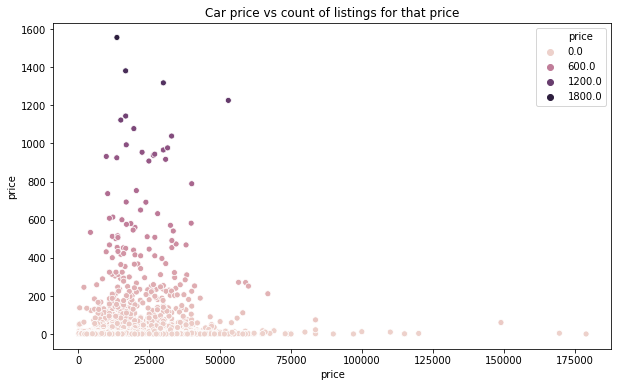

In [0]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x="price", y=ledger['price'].value_counts(), hue=ledger['price'].value_counts(), data=ledger)
plt.title("Car price vs count of listings for that price");

The scatter plot shows that there are a few price listings which are outliers. these values are stretching the plotted graph. Let us explore these outliers. Checking the rows with price greater than 5,00,000. (Chris, 2017)

In [0]:
highprice = np.where(ledger["price"]>500000)
highprice

(array([   543,  11701,  17862,  18156,  25562,  38371,  42052,  43358,
         45826,  61078,  79045,  79781,  84522,  88322, 108154, 109361]),)

In [0]:
ledger.loc[highprice]

,city,price,year,manufacturer,make,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,desc,lat,long
543,"buffalo, NY",46026000,2018.0,jeep,cherokee latitude plus 4x4,4 cylinders,gas,16500.0,lien,automatic,4wd,mid-size,SUV,custom,I recently purchased a brand new Jeep from the...,43.049800,-78.851000
11701,"atlanta, GA",4045085454,2016.0,ford,fusion,4 cylinders,gas,80011.0,clean,automatic,fwd,full-size,sedan,silver,CHRIS MOTORS \n3833 FLATSHOALS PKWY\nDECATUR G...,33.695400,-84.248900
17862,"st cloud, MN",9999999,2015.0,toyota,prius c,4 cylinders,gas,68000.0,clean,automatic,fwd,compact,sedan,red,Sale pending no longer offered to others.\n\n\...,45.139300,-95.052300
18156,spokane / coeur d'alene,625000,2015.0,chevrolet,silverado 1500 crew,8 cylinders,gas,49900.0,clean,automatic,4wd,full-size,truck,black,2015 Chevrolet Silverado 1500 LTZ Z71-Midnight...,47.658400,-117.156800
25562,south florida,1700000,2014.0,bmw,328d,4 cylinders,diesel,34590.0,clean,automatic,rwd,mid-size,sedan,black,Up for sale is a beautiful and very well equip...,25.928600,-80.183000
38371,"long island, NY",3479272999,2012.0,bmw,650i,8 cylinders,gas,58000.0,clean,automatic,rwd,full-size,pickup,grey,Car good condition Cash only\n2012 BMW 650,40.713500,-73.354600
42052,southwest michigan,2400000,2011.0,ford,expedition,8 cylinders,gas,31460.0,clean,automatic,4wd,full-size,SUV,white,2011 Ford Expedition for sale. XLT premium pac...,41.705100,-86.483800
43358,rhode island,1090000,2011.0,ford,f-150 super cab pick up,6 cylinders,gas,115650.0,clean,automatic,rwd,full-size,pickup,silver,"One owner truck Ford F-150 super cab, leather ...",41.668315,-71.601677
45826,"charlottesville, VA",777777,2011.0,bmw,550i,8 cylinders,gas,80.0,clean,other,rwd,full-size,sedan,black,4dr black and beautiful 550i.black interior.20...,38.157400,-79.065100
61078,north jersey,2099500,2008.0,ford,f 250 super duty,8 cylinders,gas,111000.0,clean,automatic,4wd,full-size,pickup,red,2008 Ford F 250 SuperDuty with 18 cu.yard\nDum...,40.954800,-73.960200


In [0]:
ledger.drop(ledger[ledger.price > 500000].index, inplace = True)

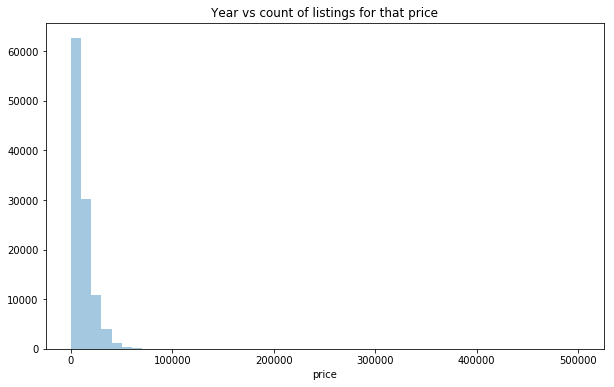

In [0]:
plt.figure(figsize=(10,6))
ax = sns.distplot(ledger['price'],kde = False)
plt.title("Year vs count of listings for that price");

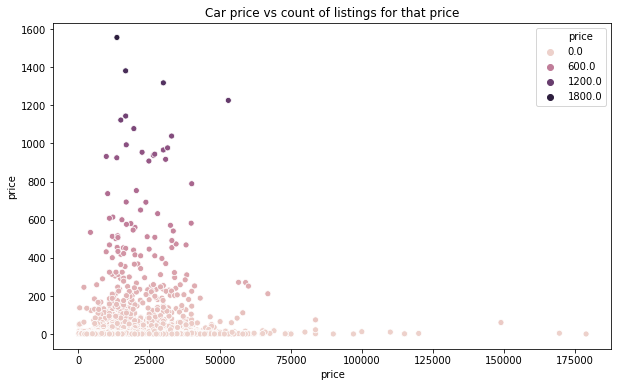

In [0]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x="price", y=ledger['price'].value_counts(), hue=ledger['price'].value_counts(), data=ledger)
plt.title("Car price vs count of listings for that price");

# INITIAL FINDINGS

The initial analysis of the dataset reveals that there are many outliers in the dataset.  Multiple void values were removed and for accurate predictions I have removed rows with prices less than 200 dollars and prices greater than 5,00,000 dollars. The scatterplot tells that there are many listings (maximum) for the cars worth of around 16,000 dollars. There is a cluster of car listings within a range of price 10,000 to 50,000 dollars. there is another cluster at around price value 200 dollar. However there are other useful columns with which I can perform the comparison of data sets with respect to different car brands and the city location. This will help in predicting the used car's prices.

# REFERENCES

Austin Reese (2019) "Used Cars Dataset" Vehicles listings from Craigslist.org. Available at: https://www.kaggle.com/austinreese/craigslist-carstrucks-data/version/7.


Tomesh, T. (2019). titanic.ipynb. Available at: https://colab.research.google.com/drive/1KftGp4lGzd7PJuKWq9qDv3xnxiQbwhwY#scrollTo=Y2tOGJ2UYPVi [Accessed 16 Aug. 2019].


Stach Overflow (2019) Available at https://stackoverflow.com/questions/33165734/update-index-after-sorting-data-frame [Accessed 17 Aug 2019]


TutorialsPoint (2019 )Available at https://www.tutorialspoint.com/python_pandas/python_pandas_dataframe.html [Accessed 18 Aug 2019]


Chris ALbon (2017), "Using Seaborn To Visualize A pandas Dataframe"  Available at: https://chrisalbon.com/python/data_wrangling/pandas_with_seaborn/  [Accessed 18 Aug 2019]